# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<font color='magenta'><b>Комментарий наставника:</b> Привет! Спасибо, что сдал работу так быстро. К сожалению, я пока не могу ее принять, т.к.:
    - не уделенно достаточного внимания этапу предобработки данных, и даже к уже сделанному на этом этапе есть вопросы;
    - ты не используешь библиотеку matplotlib, что сильно ограничивает тебя в выборе графиков, а это, в свою очередь, влияет на твои выводы;
    - центр города опредлен слишком широко;
    - как следствие всего этого - есть неверные выводы.
    
И при этом не могу не отметить твои заслуги:
    - ты работаешь с ценой квадратного метра - и это очень правильный выбор;
    - есть ряд отличных и при этом не очевидных предположений;
    - ты используешь конструкцию try except.
Жду улучшенную версию этого проекта. Удачи!
</font>

<font color='magenta'><b>Комментарий наставника 2:</b> Проект стал лучше, причем намного. В частности, качество предобаботки данных сильно выросло (хотя этот датасет, как и любой другой, можно еще чистить и чистить). Однако в проекте все еще есть ряд серьезных недоработок. В первую очередь, это работа с графиками. Хотя теперь ты выбираешь более удачные варианты, они все равно не вполне подходят под решаемые нами задачи. Например, зависимость от времени чаще всего стоит отображать самым простым графиком (вроде того, не котором ты искал центр). Где-то лучше всего сработают гистограммы, а где-то box-plot. Удели этим трем видам графиков больше внимания. Попробуй увеличить площадь графиков так, что бы подписи данных не сливались (как при изучении 10 населенных пунктов). Добавь автоматизацию графиков. И еще момент - пересмотри свой подход к анализу зависимости цены от этажа квартиры. Попробуй лучше структурировать завершающий вывод.
 
Удачи!
</font>

<font color='magenta'><b>Комментарий наставника 3:</b> Вижу, что ты взял на вооружение многие приемы с консультации. Отлично! Проект стал действительно лучше, особенно порадовал вывод в конце и чистка данных. 
Осталось сделать самую малость - таки найти зависимость от дня недели и месяца. Попробуй сделать pivot_table по медианной цене в зависимости от дня недели. То же самое с месяцем, а потом вывести полученные значения на график (простой график в виде линии). Потом снова отправляй на проверку - дожно сработать. 
</font>

<font color='magenta'><b>Комментарий наставника 4:</b> Принято! Отличная работа с месяцами и днями недели. </font>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

При первом прочтении файла видим, что данные разделены разделителем \t, поэтому откроем файл с передачей соответствующего значения.

### Шаг 2. Предобработка данных

Как было видно из информации о датасете есть пустые значения в ceiling_height, living_area, kitchen_area - эти значения не заполнены скорее всего из-за того, что арендодатели не знают сами этих цифр или решили не вносить.

В столбце balcony пропущенные значения связаны с отстуствием балконов. А в столбце is_apartment - неверно выбранный тип объекта и много пропущенных значений, удалим этот столбец.<font color='blue'> Заполним пропуски False, принимая их за то, что люди не заполняли это поле, так как квартира не была аппартаментами</font>

<font color='magenta'><b>Комментарий наставника:</b> Это точно стоит делать? Нет ли логичного объяснения пропускам в данных?</font>

<font color='magenta'><b>Комментарий наставника 2:</b> Так гораздо лучше ;-)</font>

In [2]:
data['is_apartment']=data['is_apartment'].fillna(False).astype(bool)
data['is_apartment'].value_counts()
data['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

In [3]:
data['floors_total']=data['floors_total'].fillna(0)
data['floors_total']=data['floors_total'].astype('int')

In [4]:
data['balcony']=data['balcony'].fillna(0)
data['balcony']=data['balcony'].astype('int')

In [5]:
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['parks_around3000']=data['parks_around3000'].astype('int')

In [6]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].astype('int')

In [7]:
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())

In [8]:
print(data.duplicated().sum())

0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000      

<font color='blue'>Изменили</font> дефективный столбец Is_apartment и изменили тип столбца floors_total на Int., <font color='blue'>заполнили столбец с балконами, ближайшими парками и водоемами. Дубликатов не обнаружено</font>

<font color='magenta'><b>Комментарий наставника:</b> Ты обработал не все пропуски и не до конца выполнил преобразование типов (хотя ниже ты работаешь с типом datetime, так что пробразование типов можно считать сделанным). Также не проверил таблицу на дубликаты. Возможно, это требование не достаточно ясно было прописанно в задании, но я прошу тебя уделить этому этапу больше времени. </font>

<font color='magenta'><b>Комментарий наставника 2:</b> Стало гораздо лучше.</font>

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим цену квадратного метра.

In [10]:
data['price_squade_meter']=data['last_price']/data['total_area']

Добавим день недели, месяц и год публикации объявления

In [11]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

Добавим столбец - этаж, на котором расположена квартира с вариантами "Первый"=0, "Последний"=1, "Другой"=2

In [12]:
def floors(row):
    if row['floor']==1:
        return 'Первый'
    elif row['floor']==row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [13]:
data['floor_new']=data.apply(floors, axis=1)

In [14]:
data['floor_new'].value_counts()

Другой       17446
Последний     3336
Первый        2917
Name: floor_new, dtype: int64

Добавим столбец с соотношением жилой и общей площади, а так же отношение площади кухни к общей

In [15]:
try:
    data['ratio_kitchen_area']=data['kitchen_area']/data['total_area']
except:
    data['ratio_kitchen_area']
    print('Ошибка')

In [16]:
try:
    data['ratio_living_area']=data['living_area']/data['total_area']
except:
    data['ratio_living_area']
    print('Ошибка')

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Найдем типичные параметры продаваемых квартир. Площадь, цена, количество комнат.

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_squade_meter, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5c4e7390>]],
      dtype=object)

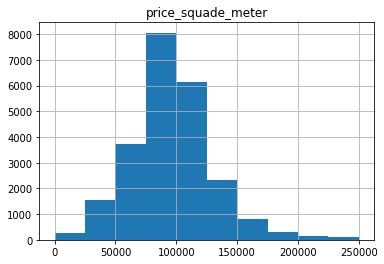

In [17]:
print(data['price_squade_meter'].describe())
data.hist('price_squade_meter', range=(0,250000))
#

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd542cdb70>]],
      dtype=object)

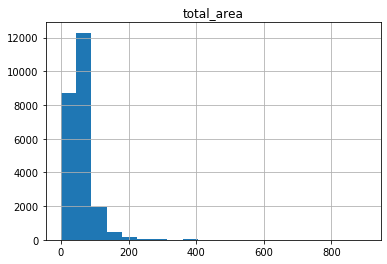

In [18]:
print(data['total_area'].describe())
data.hist('total_area', bins=20, range=(0, 900))

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd54252b70>]],
      dtype=object)

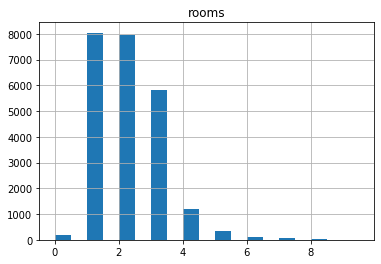

In [19]:
print(data['rooms'].describe())
data.hist('rooms', bins=data['rooms'].max(), range=(0, data['rooms'].max()/2))

<font color='magenta'><b>Комментарий наставника 2:</b> Какое число корзин тут подошло бы идеально?</font>

### Доп.вывод
Использовал автоматизацию графика из консультации.

<font color='magenta'><b>Комментарий наставника 3:</b> это не совсем про автоматизацию графиков, хотя прием использвоан хорошо.</font>

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd54267e10>]],
      dtype=object)

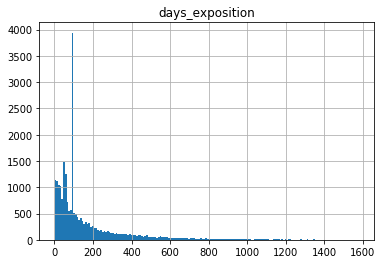

In [20]:
print(data['days_exposition'].describe())
data.hist('days_exposition', bins=180)
#

## Обнаруженные особенности: 
распределение стоимости квадратного метра квартир неравномерно, есть выбросы, отрежем все квартиры с ценой превышающей 200000 р за квм.

в количестве комнат тоже есть квартиры с большим количеством - больше 8-ми. Ограничим наше распределение 8-мью

по общей площади ограничим наши данные 100 кв.м.

по длительности продажи квартиры: ограничим 1200 дней и так же есть странные выбросы около 50 дней и 100. На графике тонкие длинные столбцы. Скорее всего это снятия объявлений с продажи после окончания оплаченного или бесплатного периодов. Не будем убирать их.

<font color='magenta'><b>Комментарий наставника:</b> Отличный вывод о причинах выборосов на 50 и на 100 дней. Но убирать эти данные не нужно. </font>

In [21]:
new_data = data.query('10000<price_squade_meter<250000').copy()
new_data = new_data.query('total_area<200').copy()
new_data = new_data.query('rooms<8').copy()
new_data = new_data.query('days_exposition<1200').copy()
#

In [22]:
data.shape
new_data.shape
#new_data.hist('last_price')

(23150, 29)

<font color='magenta'><b>Комментарий наставника:</b> Сколько процентов данных ты удалил?</font>

In [23]:
print('Удалено около {:%} данных'.format(1 - new_data.shape[0]/data.shape[0]))

Удалено около 2.316553% данных


### Доп.вывод.
Добавили предобрабоку в столбец "days_exposition" заполнив медианным значением пропущенные данные и тем самым сократили количество удаленных данных.

<font color='magenta'><b>Комментарий наставника 2:</b> Ты уверен, что нужно удалять так много данных? Возможно, стоит быть чуть деликатней с данными. Удаление более 10% данных - плохой признак (хотя иногда без этого никак). </font>

<font color='magenta'><b>Комментарий наставника 3:</b> Так гораздо лучше </font>

## Какие факторы больше всего влияют на стоимость квартиры?

### Зависимость от числа комнат

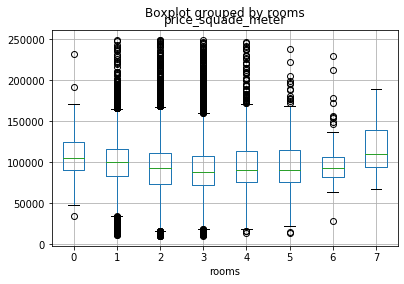

In [24]:
#new_data.plot(x='rooms', y='price_squade_meter', kind='scatter', grid=True)
new_data.boxplot(column='price_squade_meter', by='rooms')

#.plot(x='rooms', y='price_squade_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


In [25]:
print(new_data['rooms'].corr(new_data['price_squade_meter']))

-0.06180655148431745


### Вывод
Наблюдается слабая обратная связь между количеством комнат и стоимостью, квадратный метр в 1-2-3 комнатных квартирах немного дороже, чем в многокомнатных.

<font color='magenta'><b>Комментарий наставника:</b> Вывод правильный, и мне нравится, что ты работаешь со стоимостью квадратного метра. Но вот выбор типа графика не очень удачный. </font>

### Зависимость от этажа (первого или последнего)
Для начала изменим добавим столбец оставив только 0 если это первый этаж и 1 если последний.

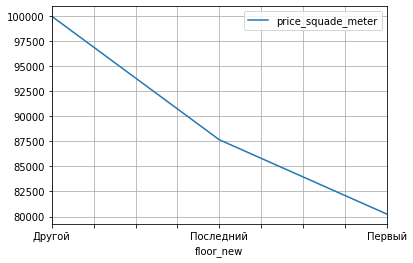

In [26]:
floors_data=new_data.pivot_table(index='floor_new', values='price_squade_meter', aggfunc='mean').sort_values(by='price_squade_meter', ascending = False)
floors_data.plot(grid=True)
#.plot(x='floor_new', y='price_squade_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [27]:
#print(new_data.query('floor_new<2').loc[:,'floor_new'].corr(new_data['price_squade_meter']))

### Вывод
Слабовыраженная прямая зависимость от этажа. Квадратный метр квартиры на первом этаже немного дешевле в среднем, чем в квартире на последнем
#### Доп вывод.
На первом этаже можно найти квартиры дешевле 50тр за квм и выше 175тр за квм не так много предложенийна первом этаже как на последнем.

## Доп.вывод
Цены на "Других" этажах в среднем выше чем на "Последних" и на "Первых", где самые дешевые квартиры.

<font color='magenta'><b>Комментарий наставника:</b> В данном случае график не иллюстрирует практически ничего. Корреляция Пирсона в данном случае тоже не самый удачный метод исследования. Попробуй подобрать более удачный график.</font>

<font color='magenta'><b>Комментарий наставника 2:</b> Зачем ты удаяешь здесь средние этажи? Ты удаляешь самое важное. </font>

<font color='magenta'><b>Комментарий наставника 3:</b> Вот теперь все правильно. </font>

### Зависимость от удаленности от центра

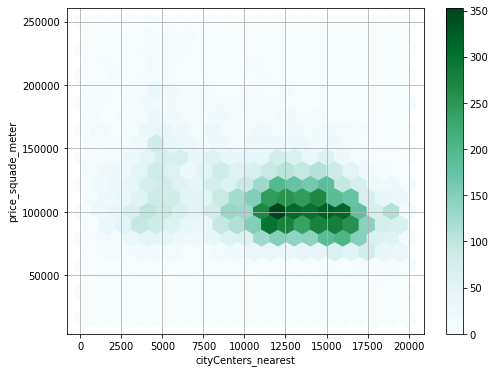

In [28]:
new_data.query('cityCenters_nearest<20000').plot(x='cityCenters_nearest', y='price_squade_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [29]:
print(new_data.query('cityCenters_nearest<20000').loc[:,'cityCenters_nearest'].corr(new_data['price_squade_meter']))

-0.34168849531157225


### Вывод
Прослеживается легкая отрицательная обратная связь, что связано с уменьшением цены при удаленности от центра, что логично

<font color='magenta'><b>Комментарий наставника:</b> вывод верен </font>

### Зависимость от даты размещения.

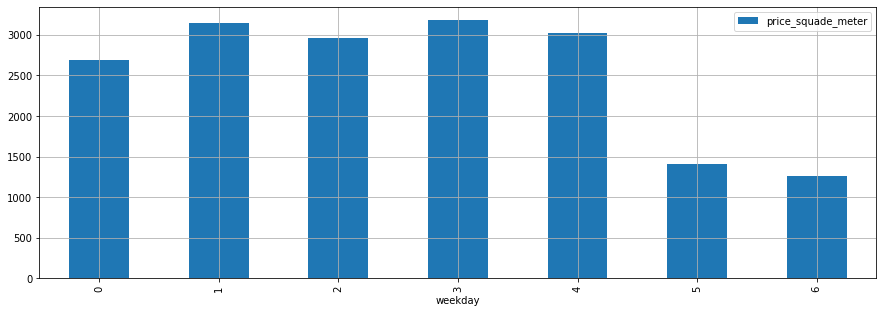

In [53]:
weekday_data=new_data.pivot_table(index='weekday', values='price_squade_meter', aggfunc='count')
weekday_data.plot(kind='bar',grid=True, figsize=(15,5))

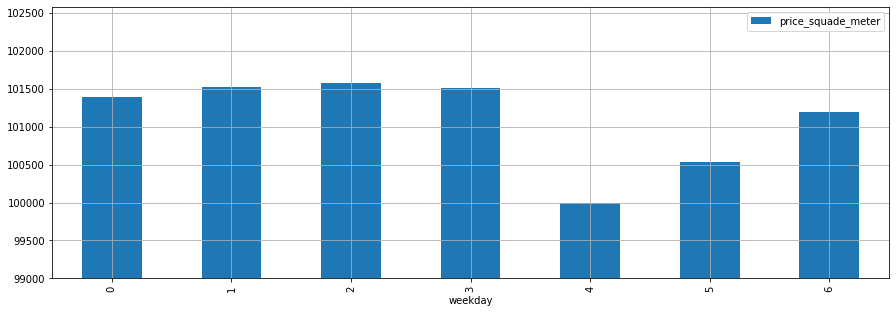

In [57]:
weekday_data=new_data.pivot_table(index='weekday', values='price_squade_meter', aggfunc='median')
#.sort_values(by='price_squade_meter', ascending = Т)
weekday_data.plot(kind='bar',grid=True, figsize=(15,5),ylim=(weekday_data['price_squade_meter'].min()-1000,weekday_data['price_squade_meter'].max()+1000))
#boxplot(column='price_squade_meter', by='weekday')

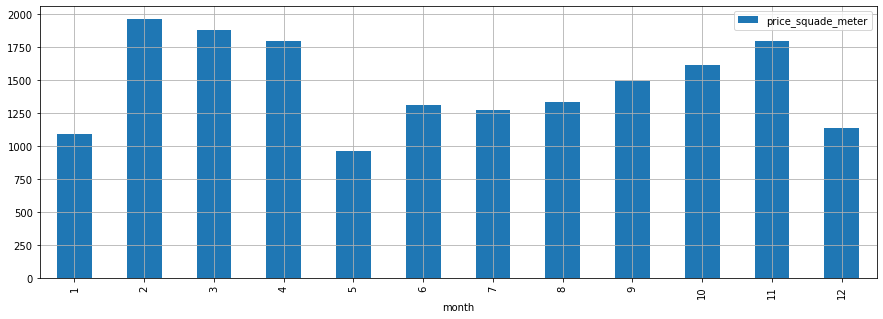

In [58]:
month_data=new_data.pivot_table(index='month', values='price_squade_meter', aggfunc='count')
month_data.plot(kind='bar',grid=True, figsize=(15,5))

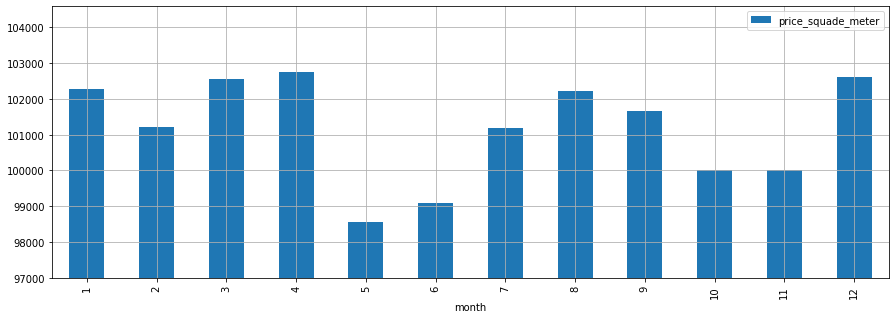

In [62]:
month_data=new_data.pivot_table(index='month', values='price_squade_meter', aggfunc='median')
month_data.plot(kind='bar',grid=True, figsize=(15,5),ylim=(weekday_data['price_squade_meter'].min()-3000,weekday_data['price_squade_meter'].max()+3000))

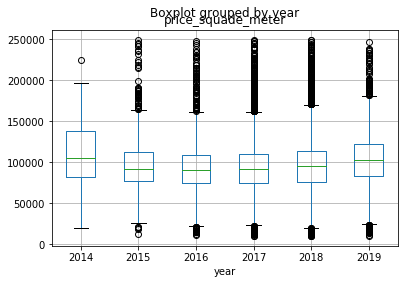

In [34]:
#new_data.plot(x='year', y='price_squade_meter', kind='box',grid=True)
new_data.boxplot(column='price_squade_meter', by='year')
#.plot(x='year', y='price_squade_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [35]:
#print(new_data.loc[:,'year'].corr(new_data['price_squade_meter']))

### Вывод
Зависимости от даты размещения нет.
#### Доп вывод.
В 2016 и 2018 годах размещалось больше объявлений с ценами за кв.м. ниже 50тр, что привело к снижению медианной цены, тогда как в 2019 году замечено повышение медианной стоимости квадратного метра.
По дням недели в целом наблюдается равенство.

## Доп.доп.вывод
### Дни недели
Большая часть объявлений выкладывается в рабочие дни, с понедельника по пятницу. Связано это с тем, что скорее всего работают агенства по продаже недвижимости, а трудовой кодекс РФ никто не отменял.
Самая низкая медианная цена продаж по пятницам, <font color='blue'>100т.р за кв.м</font>
### Месяца
В течении года пик публикации объявлений приходится на февраль и ноябрь, а спад к середине года - май-июнь. Тогда же, в мае, выставляются самые дешевые квартиры, чья медианная цена меньше <font color='blue'>99 т.р за кв.м.</font> Самые дорогие квартиры продаются в апреле и декабре, <font color='blue'>цена около 103т.р за кв.м</font>

<font color='magenta'><b>Комментарий наставника:</b> К сожалению, неудачный выбор графика и применение корреляции, которая тут также не подходит, не дают тебе возможности сделать правильный вывод.</font>

## 10 населенных пунктов с наибольшим числом объявлений.

In [36]:
new_data.pivot_table(index='locality_name', values='price_squade_meter', aggfunc='count').sort_values(by='price_squade_meter', ascending = False).head(10)

,price_squade_meter
locality_name,
Санкт-Петербург,15212
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,396
Пушкин,361
Колпино,337
посёлок Парголово,325
Гатчина,307
деревня Кудрово,299


Населенные пункты с максимальным количеством объявлений: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг

### Найдем для этих пунктов следующие данные:
Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [37]:
list_citys = ['Санкт-Петербург','посёлок Мурино','посёлок Шушары','Всеволожск','Пушкин','Колпино','посёлок Парголово','Гатчина','деревня Кудрово','Выборг']

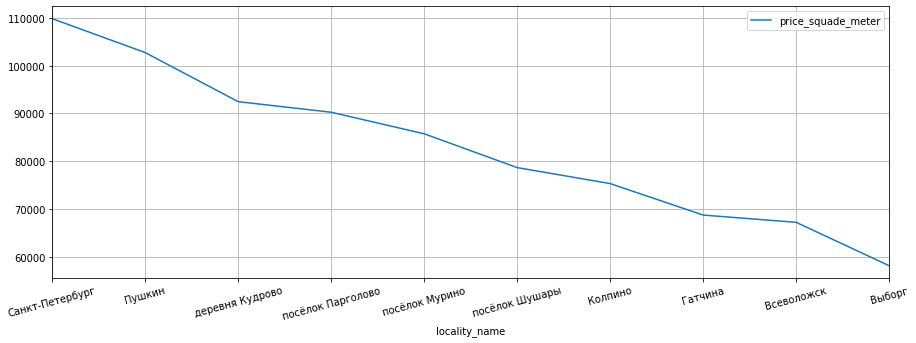

In [38]:
import matplotlib.pyplot as plt
#new_data.query('locality_name == @list_citys').pivot_table(index='locality_name', values='price_squade_meter', aggfunc='mean').sort_values(by='price_squade_meter', ascending = False).head(10)
citys_data=new_data.query('locality_name == @list_citys').pivot_table(index='locality_name', values='price_squade_meter', aggfunc='mean').sort_values(by='price_squade_meter', ascending = False)
citys_data.plot(grid=True, rot=15, figsize=(15,5))
#citys_data.boxplot(column='price_squade_meter', by='locality_name')
#x='locality_name', y='price_squade_meter', kind='pie',grid=True

### Вывод
Ожидаемо самая высокая стоимость жилья в Санкт-Петербурге - около 100 т.р за квм обойдется квартира в северной столице и около 56 т.р за квм будет стоить квартира в Выборге.

<font color='magenta'><b>Комментарий наставника:</b> Вывод верен, но хотелось бы увидеть графическое отображение связи цены и населенного пункта. </font>

## Определяем центр Санкт-Петербурга

выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

Создаем столбец с расстоянием до центра в километрах.

In [39]:
new_data.dropna(subset=['cityCenters_nearest'], inplace = True)
def km(row):
    km = row/1000
    return km
new_data['cityCentres_km']=new_data['cityCenters_nearest'].apply(km)
new_data['cityCentres_km']=new_data['cityCentres_km'].astype('int')
new_data['cityCentres_km'].head()

0    16
1    18
2    13
4     8
6    19
Name: cityCentres_km, dtype: int64

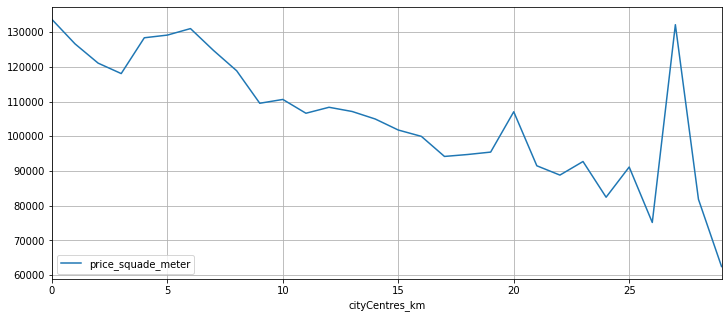

In [40]:
new_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCentres_km', values='price_squade_meter', aggfunc='mean').sort_values(by='cityCentres_km', ascending = False).plot(grid=True, figsize=(12, 5))

График сильно меняется на 25-ом километре. Будем считать это центральной зоной.
#### Новая центральная зона в пределах 13 км

<font color='magenta'><b>Комментарий наставника:</b> Мне кажется, что ты несколько "захватил лишнее" при определении центра. </font>

<font color='magenta'><b>Комментарий наставника 2:</b> А вот это горадо более удачное предполоежние. </font>

## Анализ данных квартир в центре

count      8450.000000
mean     116206.971482
std       31489.798072
min       15345.268542
25%       94322.903764
50%      109354.838710
75%      131427.800062
max      249375.000000
Name: price_squade_meter, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd3afdf0b8>]],
      dtype=object)

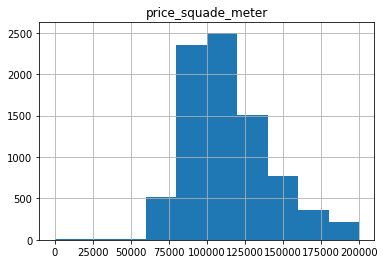

In [41]:
print(new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').loc[:,'price_squade_meter'].describe())
new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').hist('price_squade_meter', range=(0, 200000))

### Сравнение со всем городом
Средняя цена в городе больше <font color='blue'>111тр</font> за квм к 99тр за квм
<font color='blue'>так же видно, что совсем мало квартир со стоимостью ниже 60тр.за кв.м</font>

count    8450.000000
mean       65.758402
std        31.296813
min        12.000000
25%        43.000000
50%        57.800000
75%        80.000000
max       198.900000
Name: total_area, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd3af65358>]],
      dtype=object)

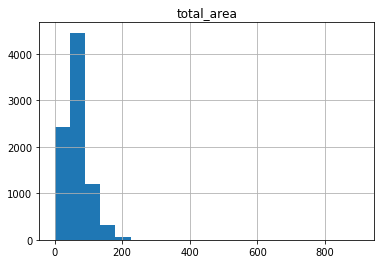

In [42]:
print(new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').loc[:,'total_area'].describe())
new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').hist('total_area', bins=20, range=(0, 900))

### Сравнение со всем городом
Средняя площадь квартир в центре меньше, чем во всем городе.

count    8450.000000
mean        2.251953
std         1.083156
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd3aed3128>]],
      dtype=object)

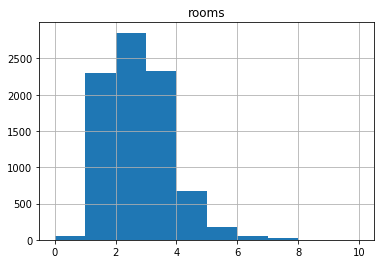

In [43]:
print(new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').loc[:,'rooms'].describe())
new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').hist('rooms', bins=10, range=(0, 10))

### Сравнение со всем городом
Общее число комнат в квартирах в центре города в среднем меньше, чем во всем городе

count    8450.000000
mean      175.535976
std       206.457793
min         2.000000
25%        52.000000
50%        95.000000
75%       211.000000
max      1194.000000
Name: days_exposition, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd3adf0c88>]],
      dtype=object)

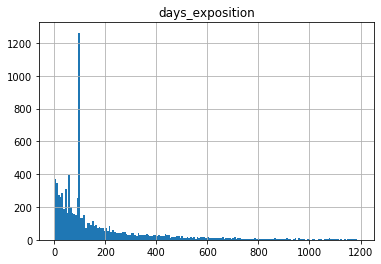

In [44]:
print(new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').loc[:,'days_exposition'].describe())
new_data.query('locality_name == "Санкт-Петербург" and cityCentres_km<13').hist('days_exposition', bins=180)

### Сравнение со всем городом
Среднее время продаж такое же как и во всем городе.
#### Квартиры в центре продаются быстрее.

<font color='magenta'><b>Комментарий наставника:</b> Когда ты переопределишь центр, ты сможешь найти больше закономерностей. </font>

### Шаг 5. Общий вывод

## Новый общий вывод.
В Санкт-Петербурге самый насыщенный рынок недвижимости. Больше всего объявлений <font color='blue'>15212</font> со средней ценой за квадратный метр в центре города <font color='blue'>116 т.р</font>. Но в центре практически невозможно найти квартиры дешевле <font color='blue'>60 т.р за кв.м</font>

С 2015 по 2019 год наблюдается рост средней стоимости квадратного метра, в 2019 году впервые медианная стоимость поднялась выше <font color='blue'>100 т.р за кв.м</font> и в целом стало продаваться больше дорогих квартир.

Пригороды Санкт-Петербурга сильно отстают от города в цене, из самых активных рынков недвижимости среди пригородов дешевле всего жить в <font color='blue'>в Выборге со средней стоимостью квадратного метра ниже 60т.р</font> и дороже всего <font color='blue'>в Пушкине, где можно найти квартиру в среднем около 100т.р за кв.м.</font>

Выбирая квартиру стоит обратить внимание на разницу в цене между первым этажом, последним и другими этажами. Приобрести свою квартиру на первом этаже обойдется почти на <font color='blue'>20% дешевле</font>

При продаже квартиры стоит ориентироваться на <font color='blue'>полугодовой срок продажи</font>

### Дни недели
Большая часть объявлений выкладывается в рабочие дни, с понедельника по пятницу. Связано это с тем, что скорее всего работают агенства по продаже недвижимости, а трудовой кодекс РФ никто не отменял.
Самая низкая медианная цена продаж по пятницам, <font color='blue'>100т.р за кв.м</font>
### Месяца
В течении года пик публикации объявлений приходится на февраль и ноябрь, а спад к середине года - май-июнь. Тогда же, в мае, выставляются самые дешевые квартиры, чья медианная цена меньше <font color='blue'>99 т.р за кв.м.</font> Самые дорогие квартиры продаются в апреле и декабре, <font color='blue'>цена около 103т.р за кв.м</font>

Исходя из полученных данных можно сделать выводы о сильно зависимости стоимости квартиры от месторасположения, квартиры в Санкт-Петербурге и ближе к центру дороже всего. За квадратный метр в однокомнатной квартире придется платить немного больше.
Зависимости стоимость от времени размещения объявления или этажа нет. <font color='blue'>В 2016 и 2018 годах было больше дешевых квартир и в июле на рынок выставляют квартиры со стоимостью ниже 50тр за кв.м., на первом этаже можно найти квартиру дешевле, чем на последнем.</font>
В среднем приходится рассчитывать на продажу в течении трех месяцев, быстрой можно назвать продажу в течении месяца, а долгой больше полугода.

<font color='magenta'><b>Комментарий наставника:</b> твои выводы изменятся, когда ты скорректируешь свои действия на предыдущих этапах. </font>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод